# Naložimo paket in podatke

Naložimo potrebne pakete.

Ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic.

Določimo še stil grafov.

In [137]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime

pd.options.display.max_rows = 10

plt.style.use('ggplot')

Naložimo razpredelnice, s katerimi bomo delali.

In [138]:
recepti = pd.read_csv('recepti.csv', index_col='id')
kategorije = pd.read_csv('kategorije.csv', index_col='tag')
kategorije_receptov = pd.read_csv('rk.csv')
sestavine = pd.read_csv('sestavine.csv')

Poglejmo si podatke.

In [139]:
recepti

,title,info,num_comments,num_votes,rating,time,difficulty,date,calories
id,,,,,,,,,
1000161205322070,Weihnachtsplätzchen,Coburger Schmätzchen,87,97,4.48,35,0,2008-03-12,6518.0
1000341205325464,Osterlamm,NaN,57,45,4.23,20,0,2008-03-12,NaN
1000381205329194,Himbeerquarkspeise auch für Diabetiker,NaN,5,5,3.57,15,0,2008-03-12,NaN
1000411205330174,Mediterraner Kichererbsensalat,vegetarisches Hauptgericht,70,119,4.50,20,1,2008-03-12,895.0
1000501205332580,Curry - Rahmsuppe,mit Äpfeln und Schweinefleisch,0,1,2.33,25,1,2008-03-12,NaN
...,...,...,...,...,...,...,...,...,...
999811205310977,Couscous - Gemüse - Salat,sommerliche Hauptmahlzeit oder Beilage zu Gegr...,2,0,NaN,30,0,2008-03-12,450.0
999861205313366,Kürbis - Curry - Kokos - Suppe,NaN,6,7,4.22,15,0,2008-03-12,NaN
999891205314969,Bratkartoffeln nach mediterraner Art,knusprig und ohne Vorkochen von Kartoffeln,34,49,4.43,25,0,2008-03-12,166.0


In [140]:
kategorije

,kat
tag,
10,Cocktail
11,Getränk
12,Longdrink
13,Indien
14,Asien
...,...
7346,INFORM-Empfehlung
7710,Paleo
9947,ketogen


In [141]:
kategorije_receptov

,recept,kategorija
0,1000161205322070,23
1,1000161205322070,32
2,1000161205322070,49
3,1000161205322070,50
4,1000161205322070,102
...,...,...
479568,999981205317565,11
479569,999981205317565,12
479570,999981205317565,32
479571,999981205317565,50


In [142]:
sestavine

,recept,sestavina
0,1000161205322070,Ei(er)
1,1000161205322070,Honig oder Apfelgelee
2,1000161205322070,Kakaopulver
3,1000161205322070,Lebkuchengewürz
4,1000161205322070,"Mandel(n) oder Nüsse, gehackt"
...,...,...
645768,999931205316349,Salz und Pfeffer
645769,999931205316349,Tomatenmark
645770,999931205316349,Wasser
645771,999981205317565,Kirschsaft


# Proučevanje podatkov

## Ocena recepta

Najprej nas zanima, od česa je odvisna ocena (rating) recepta.

Oglejmo si deset najbolje ocenjenih receptov skupaj z njihovimi sestavinami in kategorijami.

In [143]:
zdruzene_sestavine = sestavine.groupby('recept')['sestavina'].apply(list).reset_index(name='sestavine')
zdruzene_kategorije = pd.merge(kategorije_receptov, kategorije, left_on='kategorija', right_on='tag').groupby('recept')
zdruzene_kategorije = zdruzene_kategorije['kat'].apply(list).reset_index(name='kategorije')
m = pd.merge(recepti, zdruzene_sestavine, left_on='id', right_on='recept')
m = pd.merge(m, zdruzene_kategorije, on='recept')
m.sort_values('rating', ascending=False).reset_index(drop=True).head(10)

,title,info,num_comments,num_votes,rating,time,difficulty,date,calories,recept,sestavine,kategorije
0,Selbstgemachtes Italienisches Focaccia Brot,Fladenbrot einfach und schnell gemacht,73,124,4.90,25,0,2015-11-04,NaN,2942941446565480,"[Basilikumblätter, frischer, zum Garnieren, Bu...","[Backen, einfach, Snack, Brot oder Brötchen, Ü..."
1,Köstliche BBQ Spareribs für Smoker und Backofe...,Ich mache meine Spareribs nun schon sehr lange...,462,576,4.89,60,1,2013-06-26,NaN,2338561372249308,"[BBQ-Sauce , Chilipulver , Honig , Ketchup , K...","[Sommer, Hauptspeise, Party, Schwein, Grillen]"
2,Pikanter Dattel-Frischkäse-Dip,Geeignet als Dip oder als Brotaufstrich.,251,522,4.88,5,1,2014-11-23,NaN,2653511416758959,"[Currypulver , Frischkäse , Harissa oder schar...","[Frucht, Aufstrich, Käse, Saucen, Dips]"
3,Lothars beste Nürnberger Elisenlebkuchen,weihnachtliches Nachbarschaftsrezept,1190,1423,4.88,45,0,2008-03-22,NaN,1010591206190843,"[Ei(er) , Haselnüsse, gemahlen, Honig , Kuvert...","[Backen, einfach, Weihnachten, Kekse]"
4,Schneemoussetorte mit Rhabarber,NaN,131,232,4.87,90,1,2009-11-04,4251.0,1521151257327860,"[Backpulver , Butter , Ei(er) , Fett für die F...","[Backen, Vegetarisch, Frühling, Torte]"
5,Die perfekten Hamburgerbrötchen,NaN,158,272,4.87,15,1,2014-12-30,285.0,2642351415194117,"[Butter, weich, Ei(er) , Hefe, frisch, Mehl (T...","[Backen, Vegetarisch, Brot oder Brötchen]"
6,Dattelcreme,Orientalisch exotisch,73,152,4.87,15,0,2015-10-01,NaN,2911251443383530,"[Currypulver , Frischkäse , Harissapaste , Kno...","[Vegetarisch, einfach, Frucht, Saucen, Dips]"
7,Grießbrei von Großmutter,"luftig, locker und lecker",1025,1970,4.87,15,1,2007-12-04,303.0,914031196710118,"[Butter , Ei(er) , Milch , Salz , Vanillezucke...","[Vegetarisch, Schnell, einfach, Camping, Stude..."
8,Hamburger und Hot Dog Buns,Für ca. 7 Burgerbrötchen,241,352,4.87,30,0,2015-07-07,2219.0,2841831436245733,"[Ei(er) , Frischhefe, 1/2 Würfel, Honig , Milc...","[Backen, Vegetarisch, einfach, Brot oder Brötc..."
9,Rinderfilet an Whiskeyrahmsauce,NaN,236,335,4.87,20,1,2007-03-01,NaN,701261172735942,"[Butter , Butter zum Braten, Kalbsfond , Ketch...","[Festlich, Hauptspeise, Rind, Braten]"


### Težavnost

Domnevamo, da so zahtevnejši recepti slabše ocenjeni od enostavnih, saj neveščim kuharjem pogosto jedi ne uspe pripraviti, kot bi si želeli. Posledično recept slabše ocenijo, saj ne priznajo svoje nesposobnosti.

Oglejmo si povprečne ocene receptov glede na težavnost. Pri tem smo najenostavnejše recepte označili z 0, najzahtevnejše pa z 2.

In [144]:
recepti.groupby('difficulty')['rating'].mean()

difficulty
0    3.969098
1    4.001866
2    3.898764
Name: rating, dtype: float64

Domneva se je izkazala za napačno. Povprečne ocene receptov posamezne težavnosti so si precej blizu, zato lahko sklepamo, da ocena recepta ni odvisna od težavnosti.

### Čas priprave

Ker je kuharjev čas zelo cenjen, tega ne gre zanemariti. Dober recept ne bo zahteval dolge priprave, če ta ni potrebna. Domnevamo, da so recepti, ki kuharju vzamejo manj časa in gostitelja rešijo prazne mize pred nenapovedanimi obiski, bolje ocenjeni.

Oglejmo si graf ocene v odvisnosti od časa priprave.

<AxesSubplot: xlabel='time'>

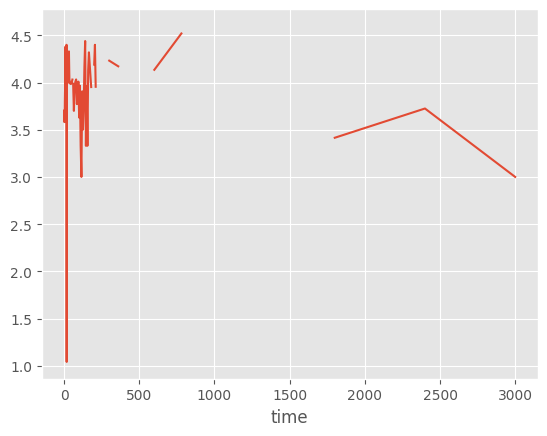

In [145]:
recepti.groupby('time')['rating'].mean().plot()

Podatki o časovno potratnih receptih naredijo graf precej nepregleden, zato jih odstranimo. Oglejmo si še ta graf.

<AxesSubplot: xlabel='time'>

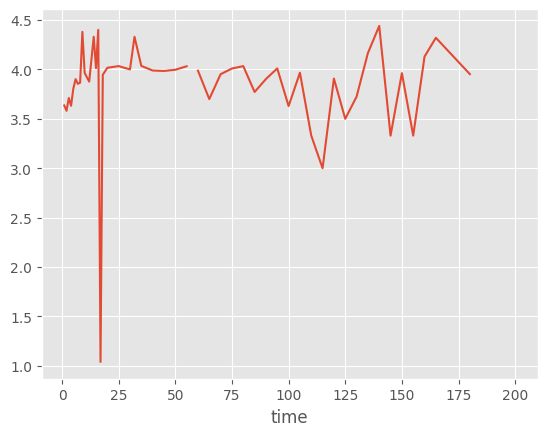

In [146]:
recepti[recepti['time'] <= 200].groupby('time')['rating'].mean().plot()

Tudi v tem primeru je odvisnost nejasna. Ocena recepta je dokaj konstantna in ni odvisna od časa priprave.

### Sestavine

Nekatere sestavine so preprosto bolj priljubljene od ostalih. Zanima nas, katere sestavine povzročijo večjo priljubljenost jedi.

Najprej uredimo tabelo _sestavine_. Opazimo, da se ista sestavina v njej pojavlja pod različnimi imeni - sestavine imajo pogosto za vejico zapisanih še nekaj podrobnosti (npr. za kaj jo bomo uporabili, ali naj bo sladkor bel ali rjav ipd.).
Teh podatkov tukaj ne želimo vključiti v analizo - olje naj bo le olje in ne olje za pečenje oz. olje za cvrenje, sladkor pa le sladkor in ne beli/rjavi sladkor. Zato dele sestavin za vejico odstranimo. Novo tabelo poimenujemo *splosne_sestavine*.

In [147]:
def odstrani_del_za_vejico(sestavina: str):
    s = sestavina.split(",")
    return s[0].strip()

In [148]:
splosne_sestavine = sestavine.copy()
splosne_sestavine['sestavina'] = sestavine['sestavina'].apply(odstrani_del_za_vejico)

Nato združimo tabeli *splosne_sestavine* in _recepti_. Ker nas pri tabeli _recepti_ zanima le rating, jo zožimo.

In [149]:
splosne_sestavine_z_ratingom = pd.merge(splosne_sestavine, recepti['rating'], left_on='recept', right_on='id')

Dobimo seznam najbolj priljubljenih sestavin in povprečno oceno receptov s to sestavino. Dodamo še stolpec s številom pojavitev posamezne sestavine v receptih.

In [150]:
a = splosne_sestavine_z_ratingom.groupby('sestavina')
a1 = a['rating'].mean().rename('rating')
a2 = a.size().rename('število pojavitev')
rating_sestavine = pd.merge(a1, a2, on='sestavina').sort_values(by='rating', ascending=False)
rating_sestavine

,rating,število pojavitev
sestavina,,
Olivenöl zum Bestreichen der Backform,4.90,1
Marinade (von dem Rub),4.89,1
Rippchen (Loin Ribs),4.89,1
Harissa oder scharfer Ajvar,4.88,1
Zucker und 4-5 EL extra,4.87,1
...,...,...
Öl gegen Überkochen,NaN,1
Öl mit Zitronenaroma,NaN,1
Öl oder Fett für den Fonduetopf,NaN,1


Opazimo, da veliko sestavin nastopa le v enem (sicer dobro ocenjenem) receptu. Ker ne želimo zaključkov o priljubljenosti sestavine delati le na podlagi majhnega števila receptov, iz tabele odstranimo vrstice s sestavinami, ki se pojavljajo v manj kot desetih receptih.

In [151]:
rating_sestavine[rating_sestavine['število pojavitev'] >= 10]

,rating,število pojavitev
sestavina,,
Cremepulver (Paradiescreme Vanille),4.542727,11
Roggenmehl Type 1150,4.513548,31
Backmalz,4.489630,54
Konfekt (Toffifee),4.489091,12
Mehlmischung,4.478182,12
...,...,...
Curaçao,3.228889,23
Süßstoff (Diabetikersüße),3.207273,14
Fasan(e),3.204118,44


### Kalorična vrednost

Še tako nepriljubljene sestavine lahko izboljšamo z dobro mero olja ali sladkorja. To pa seveda poviša kalorično vrednost jedi. Domnevamo, da so jedi z visoko kalorično vrednostjo okusnejše in zato bolje ocenjene.

Podatke o kaloričnih vrednostih zaokrožimo na stotice, da bo graf bolj pregleden.

<AxesSubplot: xlabel='calories'>

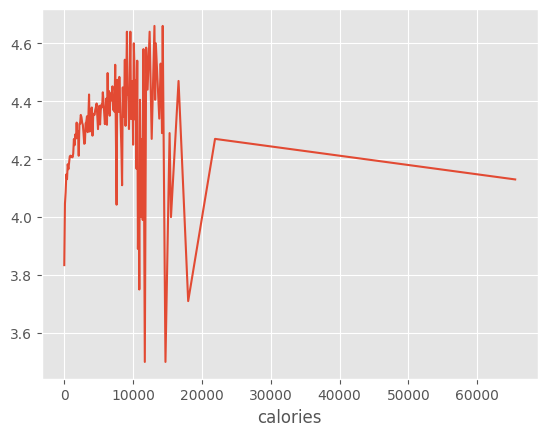

In [152]:
recepti_kalorije = recepti.copy()
recepti_kalorije['calories'] = (recepti_kalorije['calories'] / 100).round() * 100
recepti_kalorije.groupby('calories')['rating'].mean(numeric_only=True).plot()

Pri nižjih kaloričnih vrednosti ocena narašča s kalorijami, nato pa ne več. Pri vsem je pač treba imeti pravo mero in ne gre pretiravati.

## Čas priprave

### Zahtevnost

Zahtevni recepti najverjetneje zahtevajo daljšo pripravo. Preverimo.

<AxesSubplot: xlabel='difficulty'>

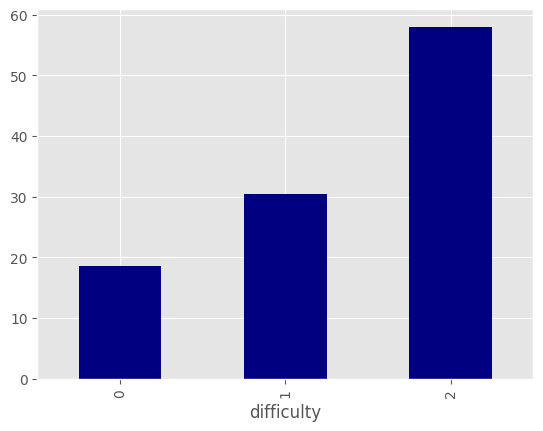

In [153]:
recepti.groupby('difficulty')['time'].mean().plot.bar(color='navy')

Ta domneva se je izkazala za resnično.

## Število ocen in komentarjev

Zanima nas, s čim je povezano število ocen in komentarjev ter kakšna je odvisnost med tema številoma.

### Ocena recepta

Ker so kuharji dobri po duši in raje pohvalijo, kot pa se nad receptom zgražajo, pričakujemo, da bodo bolje ocenjeni recepti tudi večkrat ocenjeni in komentirani. Pričakujemo tudi, da bodo imeli recepti več ocen kot komentarjev, saj ocenjevanje recepta traja manj časa kot komentiranje in zahteva manj miselnega napora, zato se ga zaposleni in utrujeni kuharji pogosteje poslužujejo. Preverimo.

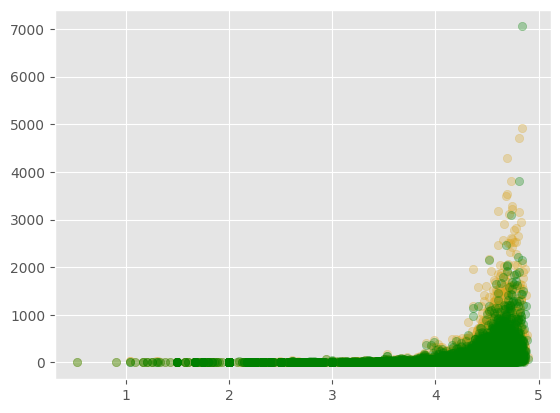

In [154]:
plt.scatter(x=recepti['rating'],y=recepti['num_votes'], alpha=0.3, color='goldenrod')
plt.scatter(x=recepti['rating'],y=recepti['num_comments'], alpha=0.3, color='green')

Zgornji graf je precej nepregleden. Izrišimo še graf povprečnega števila glasov in komentarjev glede na oceno recepta, zaokroženo na eno decimalno mesto.

<AxesSubplot: xlabel='rating'>

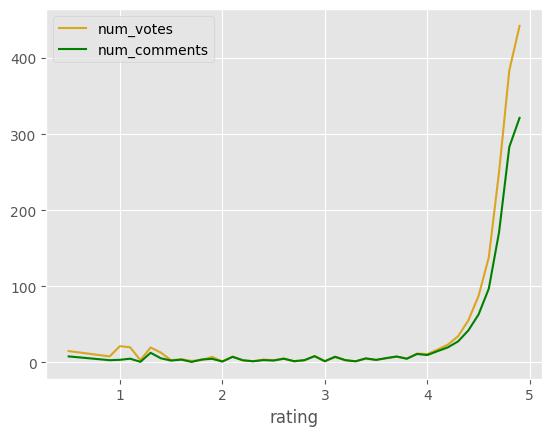

In [155]:
recepti_z_zaokrozenim_ratingom = recepti.copy()
recepti_z_zaokrozenim_ratingom['rating'] = recepti_z_zaokrozenim_ratingom.rating.round(1)
recepti_z_zaokrozenim_ratingom = recepti_z_zaokrozenim_ratingom.groupby('rating')[['num_votes', 'num_comments']]
recepti_z_zaokrozenim_ratingom.mean().plot(color=['goldenrod', 'green'])

Na tem grafu je odvisnost bolje vidna.

Začetna domneva je sicer resnična, vendar za to najbrž niso krivi dobrodušni kuharji, ampak algoritem, ki iskalcu recepta najprej ponudi boljše (tj. bolje ocenjene) recepte. Prav tako so ti večkrat preizkušeni, saj se kuharji prej lotijo dobro ocenjene jedi od tiste, ki je ocenjena slabše. Posledično so zato dobri recepti večkrat ocenjeni in komentirani.

### Zahtevnost

Pri zahtevnejših receptih imajo kuharji več vprašanj za avtorja, zato imajo zahtevni recepti domnevno več komentarjev.

<AxesSubplot: xlabel='difficulty'>

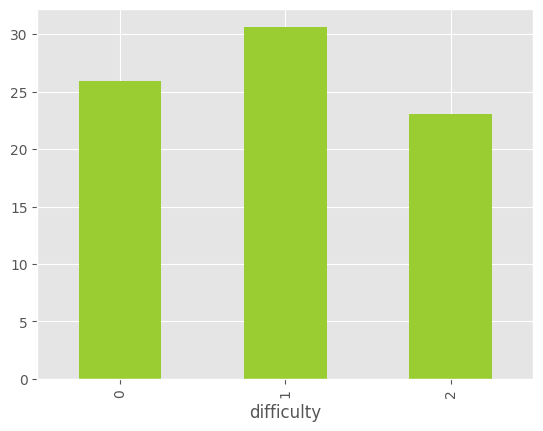

In [156]:
recepti.groupby('difficulty')['num_comments'].mean().plot.bar(color='yellowgreen')

Domneva se je izkazala za napačno. Kljub temu da je recept zahteven, je lahko postopek natančno opisan in zato komentarji z vprašanji niso potrebni. Če si ogledamo komentarje, lahko ugotovimo tudi, da se kuharji v komentarjih pogosto zahvaljujejo za odličen recept in ne le sprašujejo, kar pojasni ugotovljeno odvisnost.

### Čas objave

Recepti, ki so objavljeni že dalj časa, imajo več ocen in komentarjev.

<AxesSubplot: xlabel='date'>

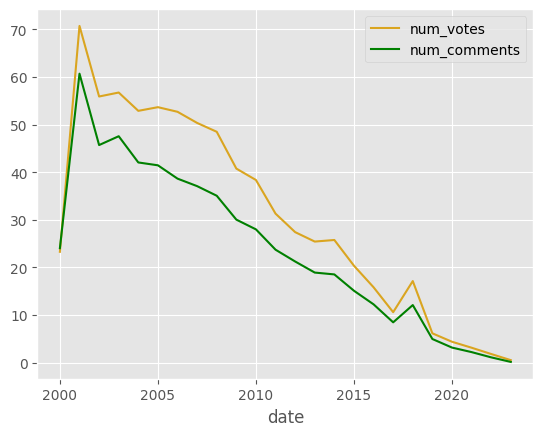

In [157]:
def leto(datum):
    datum = datetime.date.fromisoformat(datum).year
    return datum

recepti_po_letih = recepti.copy()[['date', 'num_votes', 'num_comments']].sort_values('date')
leta = recepti_po_letih['date'].apply(leto)
recepti_po_letih['date'] = leta
recepti_po_letih.groupby('date').mean().plot(color=['goldenrod', 'green'])

Izrisan graf potrjuje postavljeno hipotezo.

### Odvisnost med številom ocen in komentarjev

Izgleda, da je zveza med številom ocen in komentarjev linearna. Izrišimo še ta graf.

<AxesSubplot: xlabel='num_votes', ylabel='num_comments'>

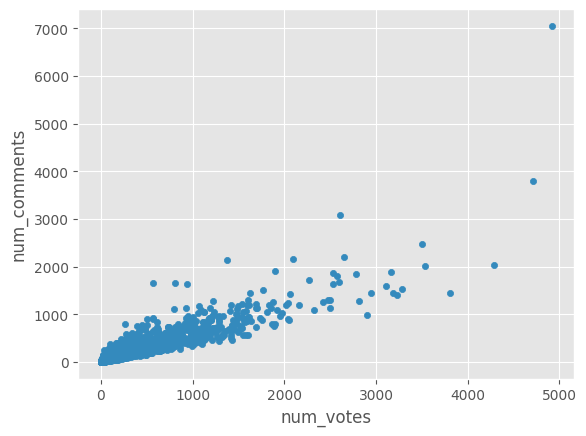

In [158]:
recepti.plot.scatter(x='num_votes', y='num_comments')

Točke se večinoma nahajajo v bližini premice, torej bi odvisnost lahko bila linearna. 

## Kategorije

Najprej si oglejmo najbolj priljubljene kategorije. Priljubljenost kategorije določamo glede na povprečno oceno recepta v tej kategoriji.

In [159]:
rating_kategorij = pd.merge(recepti, kategorije_receptov, left_on='id', right_on='recept').groupby('kategorija')['rating'].mean()
rating_kategorij_z_imeni = pd.merge(rating_kategorij, kategorije, left_on='kategorija', right_on='tag')[['kat', 'rating']]
rating_kategorij_z_imeni.sort_values('rating', ascending=False).reset_index(drop=True).head(10)

,kat,rating
0,Essig,4.425660
1,gewürze,4.425660
2,Pasten,4.425660
3,öl,4.425660
4,INFORM-Empfehlung,4.322647
5,Likör,4.273911
6,ketogen,4.232668
7,Torte,4.226179
8,Brot oder Brötchen,4.223463
9,Low Carb,4.223333


Ali bi lahko zgolj na podlagi sestavin določili, v katere kategorije spada recept?

Na vprašanje poskusimo odgovoriti s pomočjo naivnega Bayesovega klasifikatorja.

Najprej določimo, kolikokrat se posamezna sestavina pojavi med recepti in kolikšna je verjetnost, da ima naključno izbrani recept med navedenimi sestavinami to sestavino. Še prej tabelo s podatki o kategorijah preoblikujemo v bolj razumljivo obliko (namesto enoličnega idja kategorije zapišemo njeno ime).

In [160]:
kategorije_z_imeni = pd.merge(kategorije_receptov, kategorije, left_on='kategorija', right_on='tag')[['recept', 'kat']]
pojavitve_kategorij = kategorije_z_imeni.groupby('kat').size()
verjetnosti_kategorij = pojavitve_kategorij / len(recepti)

Ker imajo navedene sestavine v receptu pogosto za vejico zapisanih še nekaj podrobnosti (npr. za kaj bomo to sestavino potrebovali, ali naj bo sladkor bel ali rjav ipd.), ki jih ne želimo analizirati, dele sestavin za vejico odstranimo.

To smo že naredili pri analiziranju priljubljenosti sestavin, ustrezno tabelo pa smo poimenovali *splosne_sestavine*.

In [161]:
sestavine_kategorij = pd.merge(splosne_sestavine, kategorije_z_imeni)
stolpec_verjetnosti_sestavin_pri_kategorijah = sestavine_kategorij.groupby(['kat', 'sestavina']).size() / pojavitve_kategorij
verjetnosti_sestavin_pri_kategorijah = stolpec_verjetnosti_sestavin_pri_kategorijah.unstack().transpose().fillna(1 / len(recepti))
verjetnosti_sestavin_pri_kategorijah

kat,Afrika,Amerika,Asien,Auflauf,Aufstrich,Australien,Babynahrung,Backen,Backen oder Süßspeise,Basisrezepte,...,marinieren,neu,raffiniert oder preiswert,spezial,tee,warm,Ägypten,Österreich,Überbacken,öl
sestavina,,,,,,,,,,,,,,,,,,,,,
8 Kräuter,0.000015,0.000015,0.000015,0.000466,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000887,0.000015,0.000297,0.000015,0.000015,0.000015,0.000015,0.000015,0.000622,0.000015
Aal(e),0.000015,0.000015,0.000229,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000149,0.001742,0.000015,0.000469,0.000015,0.000015,0.000015,0.000015
Aal(e) (-filet),0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015
Aal(e) (Meeraal),0.000015,0.001109,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000871,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015
Aal(e) (Räucheraal) oder anderer,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Öl zum Sieden,0.000015,0.001109,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000234,0.000015,0.000015,0.000015,0.000015
Öl zum Unterrühren,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015
Öl zum Würzen: *,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015


Definiramo funkcijo, ki sprejme seznam sestavin in vrne prvih pet kategorij, v katere najverjetneje sodi recept z danimi sestavinami.

In [162]:
def kategorija_iz_sestavin(sestavine):
    """Funkcija sprejme seznam sestavin (nizov) in vrne imena prvih petih kategorij, 
    v katere najverjetneje sodi recept s sestavinami s tega seznama."""
    sestavine_brez_konca = [odstrani_del_za_vejico(sestavina) for sestavina in sestavine]
    r = verjetnosti_sestavin_pri_kategorijah.reset_index()
    verjetnosti = r[r.sestavina.isin(sestavine_brez_konca)].product(numeric_only=True) * verjetnosti_kategorij
    return verjetnosti.sort_values(ascending=False).head(5)

Delovanje klasifikatorja preverimo na primeru. Oglejmo si recept za pripravo marmornega kolača. Ker je teh več, izberemo prvega.

In [170]:
zdruzene_splosne_sestavine = splosne_sestavine.groupby('recept')['sestavina'].apply(list).reset_index(name='sestavine')
ssk = pd.merge(recepti[recepti['title'] == 'Marmorkuchen'], zdruzene_splosne_sestavine, left_on='id', right_on='recept')
ssk = pd.merge(ssk[['recept', 'title', 'sestavine']], zdruzene_kategorije, on='recept')
marmor_sestavine = ssk.loc[0]['sestavine']
marmor_kategorije = ssk.loc[0]['kategorije']
marmor_kategorije_bayes = kategorija_iz_sestavin(marmor_sestavine)

Ta recept sodi v naslednje kategorije:

In [171]:
marmor_kategorije

['Backen', 'Kuchen', 'Diabetiker']

Klasifikator napove kategorije:

In [172]:
marmor_kategorije_bayes

kat
Kuchen       1.074621e-06
Torte        1.398524e-07
Backen       9.044587e-08
Kekse        9.877609e-09
Süßspeise    2.402002e-09
dtype: float64

Dve izmed kategorij v podatkih se pojavita med napovedanimi.

Klasifikator bi morda deloval bolje, če bi sestavinam poleg dela za vejico odstranili tudi del za presledkom, saj so sestavine v receptih zapisane precej nekonsistentno. Nekatere sestavine tako dodatne podrobnosti vsebujejo za vejico, pri nekaterih pa vejica teh dveh delov ne loči in so podrobnosti zapisane za presledkom. Vendar bi tako morda "uničili" nekatere druge podatke o sestavinah, ki vejice namenoma ne vsebujejo.

## Čas objave

Za konec si poglejmo še, kako se s časom spreminja število objavljenih receptov letno.

<AxesSubplot: xlabel='date'>

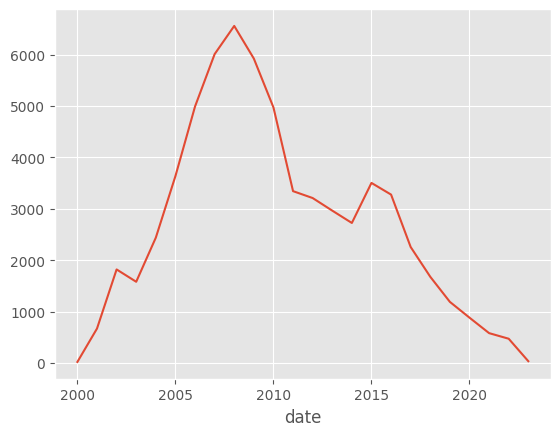

In [165]:
def leto(datum):
    datum = datetime.date.fromisoformat(datum).year
    return datum

recepti_letno = recepti.copy()
recepti_letno['date'] = recepti_letno['date'].apply(leto)
recepti_po_letih.groupby('date').size().plot()

Z grafa odčitamo, da je bilo največ receptov objavljenih leta 2008, nato pa je število objavljenih receptov počasi padalo. 

Razlog za to bi lahko bil ta, da je baza receptov že zelo velika in je zato težje najti nov (še ne objavljen) recept, ali pa je priljubljenost te spletne strani z recepti v zadnjem času padala (ljudje so se je naveličali oz. našli drug vir receptov). Možna razlaga je tudi ta, da je novih kuharjev vse manj, saj se ljudje raje ukvarjajo z drugimi rečmi.

# Komentar

Kljub številnim primerjavam je med podatki opaziti bolj šibko odvisnost, zato ne moremo postaviti splošnih zaključkov.

Čeprav je zajetih podatkov veliko, ti niso najboljši. Spletna stran namreč dopušča le ogled prvih 25 strani posamezne kategorije (torej prvih 1000 receptov). Recepti na spletni strani so (domnevno) razvrščeni po številu ogledov recepta, torej so na prvi strani bolj obiskani recepti, na zadnji pa manj. Povprečje posamezne kategorije tako ni povprečje vseh receptov znotraj kategorije, temveč povprečje prvih 1000 receptov posamezne kategorije glede na število ogledov.

Bolj obiskani recepti so navadno tudi bolje in večkrat ocenjeni ter komentirani. Nekaterim kategorijam pripada manj kot 1000 receptov, zato je povprečje ocen njihovih receptov slabše (tu gre za dejansko povprečje vseh receptov, ki pripadajo posamezni kategoriji, ne le za povprečje prvih 1000 receptov - zajeti so tudi slabše ocenjeni recepti).

Opazila sem tudi, da imajo nekateri recepti na spletni strani isto sestavino zapisano dvakrat, zato se ta pri teh receptih tudi v zajetih podatkih pojavi dvakrat. Včasih je to smiselno (npr. pri pripravi obroka lahko isto sestavino uporabimo za pripravo omake in priloge), včasih pa ne.

Rezultati te obdelave podatkov zato niso zanesljivi. Pri vseh ugotovljenih odvisnostih bi lahko šlo le za odvisnost od kategorije in števila receptov v njej.